# Вступление:
# **Преступность и недвижимость**

Смысл проекта заключается в анализе уровня преступности и рынка недвижимости в районах Хартфорда. Рассмотрим корреляцию уровня криминала и количества продоваемой и строящейся недвижимостисти (цены на нее), визуализируем данные по-районно на карте Хартфорда, проанализируем "настроения" в текстовых источниках относительно этих районов на тему преступности и цен на жилье.

# 1
С помощью веб-скраппинга посмотрим, как описываются районы Хартфорда в текстовых источниках и оценим "настроение" этих текстов:

In [ ]:
import requests
from bs4 import BeautifulSoup


neighborhood_urls = [
  'https://www.neighborhoodscout.com/ct/hartford/university-hartford#crime',
  'https://www.neighborhoodscout.com/ct/hartford/blue-hills-south#crime',
  'https://www.neighborhoodscout.com/ct/hartford/behind-rocks-southwest#crime',
  'https://www.neighborhoodscout.com/ct/hartford/blue-hills#crime',
  'https://www.neighborhoodscout.com/ct/hartford/cabot-st#crime',
  'https://www.neighborhoodscout.com/ct/hartford/parkville-south#crime',
  'https://www.neighborhoodscout.com/ct/hartford/keney-park#crime',
  'https://www.neighborhoodscout.com/ct/hartford/barry-square-west#crime',
  'https://www.neighborhoodscout.com/ct/hartford/southwest#crime',
  'https://www.neighborhoodscout.com/ct/hartford/asylum-hill-south#crime'
]

data = {}

for url in neighborhood_urls:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    title = soup.find('title').text
    main_text = soup.find_all('p')
    alltext = ''
    for text in main_text:
        alltext+=(text.get_text())
    data[title] = alltext

In [ ]:
# теперь анализируем описание этих районов с помощью NLP
from textblob import TextBlob
polarhood = {}
for text in data:
      blob = TextBlob(data[text])
      sentiment = blob.sentiment.polarity
      polarhood[text] = sentiment

In [ ]:
polarhood

{'University of Hartford Hartford, CT 06112, Neighborhood Profile - NeighborhoodScout': 0.1690532964303456,
 'Blue Hills South Hartford, CT 06112, Neighborhood Profile - NeighborhoodScout': 0.1641109668109668,
 'Behind the Rocks Southwest Hartford, CT 06106, Neighborhood Profile - NeighborhoodScout': 0.11377195806947875,
 'Blue Hills Hartford, CT 06112, Neighborhood Profile - NeighborhoodScout': 0.12190655145379554,
 'Cabot St & Albany Ave Hartford, CT 06112, Neighborhood Profile - NeighborhoodScout': 0.1545229962715512,
 'Parkville South Hartford, CT 06106, Neighborhood Profile - NeighborhoodScout': 0.16303183813822109,
 'Keney Park Hartford, CT 06120, Neighborhood Profile - NeighborhoodScout': 0.17257362467216478,
 'Barry Square West Hartford, CT 06114, Neighborhood Profile - NeighborhoodScout': 0.1530247828234405,
 'Southwest Hartford, CT 06106, Neighborhood Profile - NeighborhoodScout': 0.15034483965454112,
 'Asylum Hill South Hartford, CT 06105, Neighborhood Profile - Neighborhood

In [ ]:
sorted_polarhood = dict(sorted(polarhood.items(), key=lambda x: x[1], reverse=True))

for key, value in sorted_polarhood.items():
    print(f"{key}: {value}")

Asylum Hill South Hartford, CT 06105, Neighborhood Profile - NeighborhoodScout: 0.18547739969527677
Keney Park Hartford, CT 06120, Neighborhood Profile - NeighborhoodScout: 0.17257362467216478
University of Hartford Hartford, CT 06112, Neighborhood Profile - NeighborhoodScout: 0.1690532964303456
Blue Hills South Hartford, CT 06112, Neighborhood Profile - NeighborhoodScout: 0.1641109668109668
Parkville South Hartford, CT 06106, Neighborhood Profile - NeighborhoodScout: 0.16303183813822109
Cabot St & Albany Ave Hartford, CT 06112, Neighborhood Profile - NeighborhoodScout: 0.1545229962715512
Barry Square West Hartford, CT 06114, Neighborhood Profile - NeighborhoodScout: 0.1530247828234405
Southwest Hartford, CT 06106, Neighborhood Profile - NeighborhoodScout: 0.15034483965454112
Blue Hills Hartford, CT 06112, Neighborhood Profile - NeighborhoodScout: 0.12190655145379554
Behind the Rocks Southwest Hartford, CT 06106, Neighborhood Profile - NeighborhoodScout: 0.11377195806947875


# 2
Мы получаем отсортированный список районов. Чем больше "положительность", тем лучше район. Тем не менее, из-за того, что эта оценка была произведена, в целом, не относительно какого-то критерия. Мы не можем исходя из нее сделать ответ относиельно, например, безопасности района.

Поэтому я нашла большую базу данных с записью всех преступлений от 2005 до 2021. Сделаем рейтинг безопасных районов.

In [ ]:
import pandas as pd

In [ ]:
dataa = pd.read_csv('Police_Incidents_01012005_to_05182021.csv')

In [ ]:
dataa

,Case_Number,Date,Time_24HR,Address,UCR_1_Category,UCR_1_Description,UCR_1_Code,UCR_2_Category,UCR_2_Description,UCR_2_Code,Neighborhood,geom
0,21013791,05/10/2021,1641,403 GARDEN ST,32* - PROPERTY DAMAGE ACCIDENT,PROP DAM ACC,3221,NaN,NaN,0,CLAY-ARSENAL,"(41.780238042803745, -72.68497435174203)"
1,21014071,05/13/2021,245,59 ELLINGTON ST,32* - PROPERTY DAMAGE ACCIDENT,PROP DAM ACC,3261,24* - MOTOR VEHICLE LAWS,EVADING RESP,2401,BEHIND THE ROCKS,"(41.74625648731947, -72.70484012171347)"
2,20036741,11/29/2020,1703,267 ZION ST,31* - PERSONAL INJURY ACCIDENT,PERS INJ ACC,3124,23* - DRIVING LAWS,FOLL TOO CLOSE,2334,BEHIND THE ROCKS,"(41.74850755091766, -72.69411393999614)"
3,21013679,05/09/2021,2245,HOMESTEAD AV & WOODLAND ST,31* - PERSONAL INJURY ACCIDENT,PERS INJ ACC,3124,23* - DRIVING LAWS,TRAVELING TOO FAST,2327,UPPER ALBANY,"(41.778689832211015, -72.69776621329845)"
4,21014070,05/13/2021,240,BENTON ST & WEBSTER ST,32* - PROPERTY DAMAGE ACCIDENT,PROP DAM ACC,3221,NaN,NaN,0,BARRY SQUARE,"(41.74653366174123, -72.68316706252509)"
...,...,...,...,...,...,...,...,...,...,...,...,...
708980,9000978,01/09/2009,955,219 ZION ST,34* - OTHER ACCIDENT,HAZARDOUS CONDITION,3490,NaN,NaN,0,BEHIND THE ROCKS,"(41.747163627033345, -72.69420967955826)"
708981,13014833,05/07/2013,1139,150 WARD ST,24* - MOTOR VEHICLE LAWS,OP UNREG M/V,2414,24* - MOTOR VEHICLE LAWS,TOWED VEHICLE,2430,FROG HOLLOW,"(41.75622433710221, -72.68959981062677)"
708982,6011544,03/18/2006,1155,334 FRANKLIN AV,32* - PROPERTY DAMAGE ACCIDENT,PROP DAM ACC,3224,23* - DRIVING LAWS,IMPRP LANE CHANGE,2344,SOUTHEND,"(41.74104529114852, -72.67573171674711)"
708983,12033004,09/19/2012,1206,ASHLEY ST & SIGOURNEY ST,39* - ANIMAL COMPLAINT,ANIMAL BITE,3904,NaN,NaN,0,ASYLUM HILL,"(41.774504796809694, -72.69245815646983)"


In [ ]:
pivot_table = dataa.groupby(['Neighborhood', 'UCR_1_Category']).size().unstack().reset_index()

# Заменяем NaN значения на 0 (предполагая, что NaN означает отсутствие преступлений данного типа)
pivot_table = pivot_table.fillna(0)

# Переименовываем столбцы
pivot_table.columns.name = None

# Переименовываем индекс
pivot_table.reset_index(drop=True, inplace=True)

In [ ]:
corr_matrix = pivot_table.corr().stack()

corr_matrix = corr_matrix[corr_matrix.index.get_level_values(0) != corr_matrix.index.get_level_values(1)]

corr_matrix = corr_matrix[corr_matrix.index.get_level_values(0) < corr_matrix.index.get_level_values(1)]

# Сортируем по абсолютному значению корреляции
corr_matrix = corr_matrix.abs().sort_values(ascending=False)

# Выводим 10 самых коррелируемых категорий преступлений
print('Самые коррелируемые категории преступлений:')
print(corr_matrix.head(20))

# Выводим 10 самых не коррелируемых категорий преступлений
print('\nСамые не коррелируемые категории преступлений:')
print(corr_matrix.tail(20))


Самые коррелируемые категории преступлений:
35* - MISC. CRIMES AGAINST PROPERTY  42* - CARE FOR SICK                    0.976218
19* - CRIMES AGAINST THE PUBLIC      42* - CARE FOR SICK                    0.970195
15* - FAMILY OFFENSES                20* - RADIO SIGNAL                     0.969238
17* - LIQUOR LAWS                    44* - MISC. WANTS                      0.964995
04* - AGGRAVATED ASSAULT             08* - SIMPLE ASSAULT                   0.960264
19* - CRIMES AGAINST THE PUBLIC      35* - MISC. CRIMES AGAINST PROPERTY    0.959203
05* - BURGLARY                       07* - MOTOR VEHICLE THEFT              0.957895
03* - ROBBERY                        08* - SIMPLE ASSAULT                   0.954883
11* - STOLEN PROPERTY                24* - MOTOR VEHICLE LAWS               0.953667
03* - ROBBERY                        20* - RADIO SIGNAL                     0.952921
08* - SIMPLE ASSAULT                 29* - FOUND PERSON/PROPERTY            0.951064
04* - AGGRAVATED ASSA

<ipython-input-115-ef082d579c6b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = pivot_table.corr().stack()


In [ ]:
correlations = pivot_table.corr()

sum_of_correlations = correlations.sum()

# Сортируем категории по сумме корреляций
sorted_sum_of_correlations = sum_of_correlations.sort_values(ascending=False)

print(sorted_sum_of_correlations)


08* - SIMPLE ASSAULT                   35.477176
42* - CARE FOR SICK                    35.096257
35* - MISC. CRIMES AGAINST PROPERTY    34.706404
03* - ROBBERY                          34.505840
19* - CRIMES AGAINST THE PUBLIC        34.177491
04* - AGGRAVATED ASSAULT               33.552232
20* - RADIO SIGNAL                     33.407618
51* - MISC. MANAGEMENT INFO.           33.312521
29* - FOUND PERSON/PROPERTY            33.287536
28* - MISSING PERSON/PROPERTY          32.555622
15* - FAMILY OFFENSES                  32.262806
11* - STOLEN PROPERTY                  31.966589
31* - PERSONAL INJURY ACCIDENT         31.814613
24* - MOTOR VEHICLE LAWS               31.512476
37* - FIRE-RELATED                     31.500444
12* - WEAPONS OFFENSES                 30.525181
34* - OTHER ACCIDENT                   30.272905
43* - MENTAL CASE                      30.029932
53* - LANDLORD-TENANT                  29.589828
25* - CITY ORDINANCES                  29.355498
07* - MOTOR VEHICLE 

<ipython-input-119-298dc86460cd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = pivot_table.corr()


Видно, самый коррелируемый признак "simple assault". То есть чем больше зафиксированных таких престплуний, тем больше и других видов престплений. Поэтому мы можем, ориентируясь по этому виду, отранжировать города по безопасности. То есть сделать вывод о безопасности в целом.

In [ ]:
sorted_table = pivot_table.sort_values('08* - SIMPLE ASSAULT', ascending=False)

In [ ]:
sorted_table

,Neighborhood,01* - HOMICIDE,03* - ROBBERY,04* - AGGRAVATED ASSAULT,05* - BURGLARY,06* - LARCENY,07* - MOTOR VEHICLE THEFT,08* - SIMPLE ASSAULT,09* - FORGERY/COUNTERFEITING,10* - FRAUD/EMBEZZLEMENT/EXTORTION,...,44* - MISC. WANTS,46* - JUVENILE-RELATED,47* - CONNECTING CASE,49* - SHOOTING,51* - MISC. MANAGEMENT INFO.,52* - SHOTS FIRED,5210 - SHOTS FIRED CONFIRMED,5211 - SHOTS FIRED UNCONFIRMED,53* - LANDLORD-TENANT,55* - REPORT-RELATED
8,NORTHEAST,80.0,935.0,2130.0,1782.0,4439.0,1748.0,4405.0,101.0,108.0,...,818.0,118.0,0.0,5.0,3541.0,2868.0,14.0,47.0,158.0,835.0
1,BARRY SQUARE,45.0,995.0,1381.0,1819.0,5833.0,2009.0,3925.0,80.0,108.0,...,602.0,633.0,0.0,2.0,2611.0,1497.0,7.0,6.0,151.0,768.0
0,ASYLUM HILL,32.0,912.0,1292.0,1267.0,6051.0,1733.0,3755.0,125.0,164.0,...,601.0,335.0,0.0,4.0,4218.0,856.0,3.0,14.0,103.0,1246.0
6,FROG HOLLOW,29.0,923.0,1267.0,1267.0,5161.0,1204.0,3233.0,114.0,114.0,...,939.0,139.0,0.0,8.0,3087.0,1435.0,6.0,14.0,107.0,861.0
4,CLAY-ARSENAL,48.0,629.0,1350.0,861.0,2967.0,906.0,3167.0,101.0,84.0,...,703.0,903.0,0.0,2.0,2995.0,1254.0,4.0,10.0,79.0,675.0
15,UPPER ALBANY,52.0,619.0,1346.0,811.0,2515.0,870.0,2820.0,117.0,114.0,...,450.0,424.0,0.0,3.0,1922.0,1267.0,14.0,15.0,120.0,571.0
5,DOWNTOWN,12.0,550.0,715.0,474.0,7093.0,763.0,2515.0,148.0,202.0,...,3625.0,196.0,0.0,1.0,2004.0,212.0,1.0,4.0,17.0,1577.0
13,SOUTHEND,26.0,752.0,847.0,1776.0,4919.0,1745.0,2434.0,154.0,204.0,...,370.0,301.0,0.0,5.0,1764.0,711.0,2.0,0.0,98.0,572.0
3,BLUE HILLS,24.0,346.0,578.0,846.0,2269.0,784.0,1964.0,77.0,69.0,...,234.0,393.0,1.0,1.0,1433.0,941.0,2.0,9.0,52.0,372.0
2,BEHIND THE ROCKS,17.0,346.0,681.0,1013.0,6087.0,1236.0,1956.0,57.0,72.0,...,450.0,53.0,0.0,1.0,1492.0,817.0,2.0,4.0,63.0,505.0


# 3
Видно, что по этому признаку самый опасный район Northeast. Объясним этот исход событий с помощью "зонирования".

Посмотрим к какой "зоне" города относится этот район. Для этого используем новую базу данных и соотнесем данные районов с данными зон города.

In [ ]:
# новая таблица данных
zones

,OBJECTID,LABEL,ACRES,GlobalID,SHAPESTArea,SHAPESTLength,geometry
0,17112,N-3-1,9.11974626,{E3EE6A28-6C36-48B3-876A-E42AD43B7410},397254.557983398,3095.85946399691,None
1,17113,N-3-1,8.12185791,{559FB82C-23FB-4353-B8DB-87CB7AA5C197},353786.715332031,3157.7131618503,None
2,17114,N-3-1,7.68425352,{8172198C-44A3-4671-8290-FBF8201B22CC},334724.74432373,3260.78768503537,None
3,17115,N-3-1,0.75794007,{38CAD916-AE4A-4B18-88E5-4EC6A5D799DF},33015.7373657227,794.288899043288,None
4,17116,N-3-1,2.9593989,{3194A4FC-B023-4D51-8E5D-2FC0E21948F5},128910.900512695,2021.78429831719,None
...,...,...,...,...,...,...,...
2020,19132,MX-2,16.55334082,{8DE358B2-E695-4A96-98D7-AF606E07966D},185638.308898926,2263.79061464701,None
2021,19133,MX-1,16.55334082,{D6EE9C97-178D-40FD-B3CF-781D525A913B},194756.109375,1893.41854955068,None
2022,19134,MX-1,16.55334082,{7D1B39B5-194C-42F0-9117-7361FD947084},152505.217712402,1991.58948581149,None
2023,19135,MX-2,16.55334082,{7410D2AC-FE2A-4075-ABF3-5E1A9D3EF18A},188161.010986328,2056.98885801392,None


In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 62.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
from matplotlib import pyplot as plt

In [ ]:
import requests
import pandas as pd

# ArcGIS
arcgis_url = "https://gis1.hartford.gov/arcgis/rest/services/OpenData_Housing_Development/MapServer/4"
params = {
    'f': 'json',
    'where': '1=1',
    'outFields': '*',
}
response = requests.get(arcgis_url, params = params)
data_arcgis = response.json()

# Socrata
socrata_url = "https://data.hartford.gov/resource/889t-nwfu.json"
params = {
    '$limit': 5000,
    '$$app_token': 'APP_TOKEN',
}
response = requests.get(socrata_url)
data_socrata = response.json()

df_arcgis = pd.DataFrame(data_arcgis)
df_socrata = pd.DataFrame(data_socrata)


ValueError: ignored

In [ ]:
df_socrata

,case_number,date,time_24hr,address,ucr_1_category,ucr_1_description,ucr_1_code,ucr_2_code,neighborhood,geom,:@computed_region_ugzy_ysqh,:@computed_region_35zh_8fi2,:@computed_region_2vdc_22if,:@computed_region_haf6_6xye,ucr_2_category,ucr_2_description
0,5000024,2005-01-01T00:00:00.000,0000,115 ASYLUM ST,55* - REPORT-RELATED,NO CASE INFO - UNABLE TO,5510,0,DOWNTOWN,"{'latitude': '41.766946453488366', 'longitude'...",19,10,15050,1041,NaN,NaN
1,9010396,2005-01-01T00:00:00.000,0000,56 VINE ST,55* - REPORT-RELATED,CASE DRAWN IN ERROR,5520,0,UPPER ALBANY,"{'latitude': '41.78097081523108', 'longitude':...",15,13,18493,1041,NaN,NaN
2,5001381,2005-01-01T00:00:00.000,0000,161 ENFIELD ST,29* - FOUND PERSON/PROPERTY,M-V-S-O-T-R-L,2905,0,NORTHEAST,"{'latitude': '41.78614510044552', 'longitude':...",16,16,18493,1041,NaN,NaN
3,5000084,2005-01-01T00:00:00.000,0001,127 IRVING ST,34* - OTHER ACCIDENT,OCC-INJ-POLICE,3440,0,UPPER ALBANY,"{'latitude': '41.78011225750916', 'longitude':...",15,13,18493,1041,NaN,NaN
4,5029127,2005-01-01T00:00:00.000,0001,14 GILMAN ST,19* - CRIMES AGAINST THE PUBLIC,SIMPLE TRESSPASS,1909,2418,SOUTHEND,"{'latitude': '41.737652996541435', 'longitude'...",21,2,18494,1041,24* - MOTOR VEHICLE LAWS,MISUSE OF PLATES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5001075,2005-01-08T00:00:00.000,1450,126 SOUTH ST,35* - MISC. CRIMES AGAINST PROPERTY,CR MISCHIEF 2,3502,0,SOUTHEND,"{'latitude': '41.735411974808876', 'longitude'...",20,2,18494,1041,NaN,NaN
996,5001313,2005-01-08T00:00:00.000,1500,26 CONGRESS ST,19* - CRIMES AGAINST THE PUBLIC,BREACH-PEACE,1901,1904,SOUTH GREEN,"{'latitude': '41.75445662917266', 'longitude':...",8,6,18494,1041,19* - CRIMES AGAINST THE PUBLIC,DOMESTIC
997,5001076,2005-01-08T00:00:00.000,1500,1307 MAIN ST,24* - MOTOR VEHICLE LAWS,FT CARRY INSURANCE,2417,2430,DOWNTOWN,"{'latitude': '41.772245875611674', 'longitude'...",19,10,15050,1041,24* - MOTOR VEHICLE LAWS,TOWED VEHICLE
998,5001056,2005-01-08T00:00:00.000,1500,45 EVERGREEN AV,06* - LARCENY,LARC4-M/V PART-STO-PLATE,645,0,WESTEND,"{'latitude': '41.76469392621961', 'longitude':...",35,14,15051,1041,NaN,NaN


In [ ]:
df_arcgis

,error
code,400
details,[Invalid URL]
message,Invalid URL


In [ ]:
# в виде geodataframes
zones_gdf = gpd.GeoDataFrame(df_arcgis, geometry=gpd.points_from_xy(df_arcgis.longitude, df_arcgis.latitude))
divisions_gdf = gpd.GeoDataFrame(df_socrata, geometry=gpd.points_from_xy(df_socrata.longitude, df_socrata.latitude))

# Объедим инфо о зонах и адм районах
result_gdf = gpd.sjoin(zones_gdf, divisions_gdf, op='intersects')

print(result_gdf)


AttributeError: ignored

но у меня ничего не получилось........

# НО
я решила не зонировать районы Хартфорда, а посмотреть на рынок недвижимости в этих рйонах. Таким образом, обходя проблему зон. Ведь тогда получается, что зоны "жилые кварталы", "downtown" и тд и тп (которые и равны зонам с высоким уровнем застройки), как раз и отличаются высоким уровнем преступности. См. последний график

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 84.5 MB/s eta 0:00:00


In [ ]:
import urllib.request, json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
# Скачиваем данные о разрешениях на строительство/продажу недвижимости
with urllib.request.urlopen(
    "https://data.hartford.gov/api/views/p2vw-4aab/rows.json?accessType=DOWNLOAD") as url:
    data = json.load(url)['data']

# Достаем из всех полей только номер дела, дату, широту и долготу. Все заворачиваем в список
datalist = []
for row in data:
    if float(row[24][1]) > 45:
        continue
    d = {}
    lt = float(row[24][1])
    lg = float(row[24][2])
    d['lt'] = lt
    d['lg'] = lg
    if not 38 < lt < 45 or not -75 < lg < -70:
        continue
    datalist.append(d)

# Получившийся список собираем в DataFrame pandas
df_permits = pd.DataFrame(data=datalist)
df_permits.head()

,lt,lg
0,41.793989,-72.696245
1,41.773296,-72.713670
2,41.796604,-72.698292
3,41.768260,-72.675828
4,41.758856,-72.692672


In [ ]:
# Аналогично - огромный json с записями о полицейских инцидентах
with urllib.request.urlopen("https://data.hartford.gov/api/views/889t-nwfu/rows.json?accessType=DOWNLOAD") as url:
    data = json.load(url)['data']

# Достаем из всех полей только номер дела, дату, широту и долготу. Все заворачиваем в список
datalist = []
for row in data:
    d = {}
    lt = float(row[19][1])
    lg = float(row[19][2])
    d['lt'] = lt
    d['lg'] = lg
    if not 38 < lt < 45 or not -75 < lg < -70:
        continue
    datalist.append(d)

# Получившийся список собираем в DataFrame pandas
df_police = pd.DataFrame(data=datalist)
df_police.head()

,lt,lg
0,41.780238,-72.684974
1,41.746256,-72.704840
2,41.748508,-72.694114
3,41.778690,-72.697766
4,41.746534,-72.683167


Сделаем кластеризацию k-means, чтобы найти ключевые центры строительства/продажи недвижимости и криминала

Сначала посмотрим, как от кол-ва кластеров зависит ошибка, чтобы выбрать этот параметр

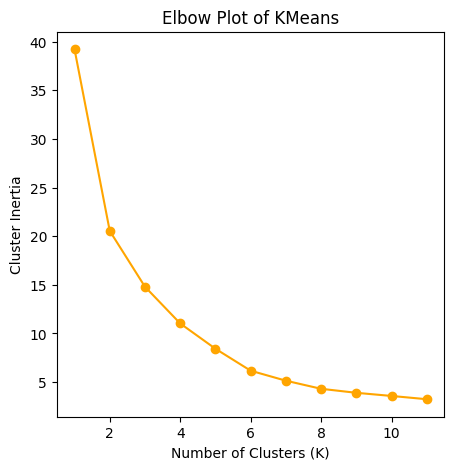

In [ ]:
def find_best_clusters(df, maximum_K):
    clusters_centers = []
    k_values = []

    for k in range(1, maximum_K):
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
    return clusters_centers, k_values

def generate_elbow_plot(clusters_centers, k_values):
    figure = plt.subplots(figsize = (5, 5))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

clusters_centers, k_values = find_best_clusters(df_permits, 12)
generate_elbow_plot(clusters_centers, k_values)

Видно, что почти гипербола. Пусть k = 6

In [ ]:
kmeans_model = KMeans(n_clusters = 6)
kmeans_model.fit(df_permits)

KMeans(n_clusters=6)

In [ ]:
# Припишем к каждой записи номер кластера
df_permits["clusters"] = kmeans_model.labels_
# На будущее сохраним центры кластеров
df_permits_centers = pd.DataFrame(data = kmeans_model.cluster_centers_)
df_permits_centers = df_permits_centers.rename(columns={0: "lt", 1: "lg"})
df_permits_centers

,lt,lg
0,41.739367,-72.676221
1,41.766690,-72.702671
2,41.737801,-72.700182
3,41.786212,-72.678108
4,41.762476,-72.677770
5,41.795664,-72.701562


То же самое для криминала

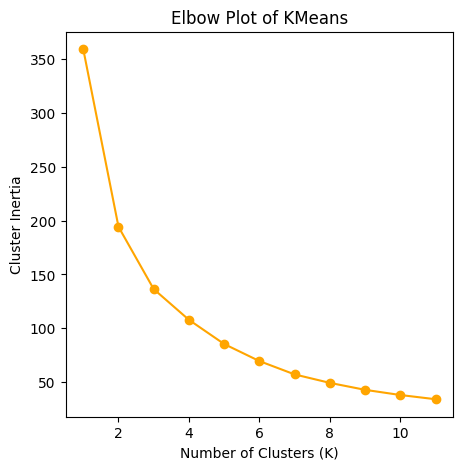

In [ ]:
clusters_centers, k_values = find_best_clusters(df_police, 12)
generate_elbow_plot(clusters_centers, k_values)

Видно, что почти гипербола. Пусть k = 7

In [ ]:
kmeans_model = KMeans(n_clusters = 7)
kmeans_model.fit(df_police)

KMeans(n_clusters=7)

In [ ]:
# Припишем к каждой записи номер кластера
df_police["clusters"] = kmeans_model.labels_
# На будущее сохраним центры кластеров
df_police_centers = pd.DataFrame(data = kmeans_model.cluster_centers_)
df_police_centers = df_police_centers.rename(columns={0: "lt", 1: "lg"})

Отобразим карту со всеми данными и центрами кластеров

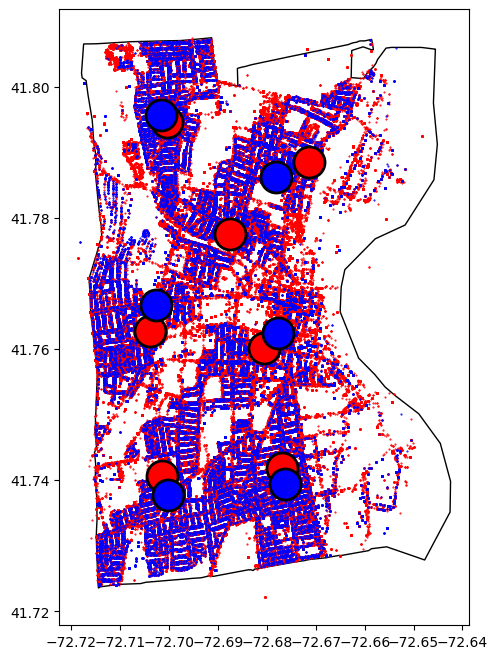

In [ ]:
# Скачаем очертания региона
counties = gpd.read_file(
    '/content/sample_data/town.shp')
# Подготовим точки
geom_permits = [Point(xy) for xy in zip(df_permits['lg'], df_permits['lt'])]
geom_permits_centers = [Point(xy) for xy in zip(df_permits_centers['lg'],
                                                    df_permits_centers['lt'])]
geom_police = [Point(xy) for xy in zip(df_police['lg'], df_police['lt'])]
geom_police_centers = [Point(xy) for xy in zip(df_police_centers['lg'],
                                                    df_police_centers['lt'])]

gdf_permits = gpd.GeoDataFrame(df_permits, geometry=geom_permits, crs="EPSG:4326")
gdf_permits_centers = gpd.GeoDataFrame(df_permits_centers,
                                            geometry=geom_permits_centers, crs="EPSG:4326")
gdf_police = gpd.GeoDataFrame(df_police, geometry=geom_police, crs="EPSG:4326")
gdf_police_centers = gpd.GeoDataFrame(df_police_centers,
                                          geometry=geom_police_centers, crs="EPSG:4326")
city = counties[counties["NAME10"] == "Hartford"]

fig, ax = plt.subplots(figsize=(8, 8))
city.plot(ax=ax, color='white', edgecolor='black')
gdf_police.plot(ax=ax, marker='.', color='red', markersize=1)
gdf_permits.plot(ax=ax, marker='.', color='blue', markersize=1)
gdf_police_centers.plot(ax=ax, marker='o', color='red',
                            edgecolor='black', linewidth=2, markersize=500)
gdf_permits_centers.plot(ax=ax, marker='o', color='blue',
                              edgecolor='black', linewidth=2, markersize=500)

fig.savefig('/content/sample_data/town.png')
plt.show()

# Вывод
Чем больше застройка, то есть количество сделок о купли-продаже недвижимости, и где больше решается построить недвижимости в этих зонах-районах, тем больше преступность в этих местах. Казалось бы этот вывод относительно какого незнакомого города в США незначителен. Тем не менее, похожие выводы делали многие специалисты и относительно других мегаполисов. Целые теории зонирования говорят об этом. Также эти зоны, которые у меня не получилось скачать, как раз видны на графике. Все кварталы, которые виднеются, это определенные районы, это как раз эти зоны. И при наложении уровня преступности и уровня застройки они как раз прорисовываются. Пустые зоны - это промышленные зоны или парки/пустыри. Это можно увидеть, если наложить на зоны Хартфорда (беру любые из интернета), как раз точки преступлений.

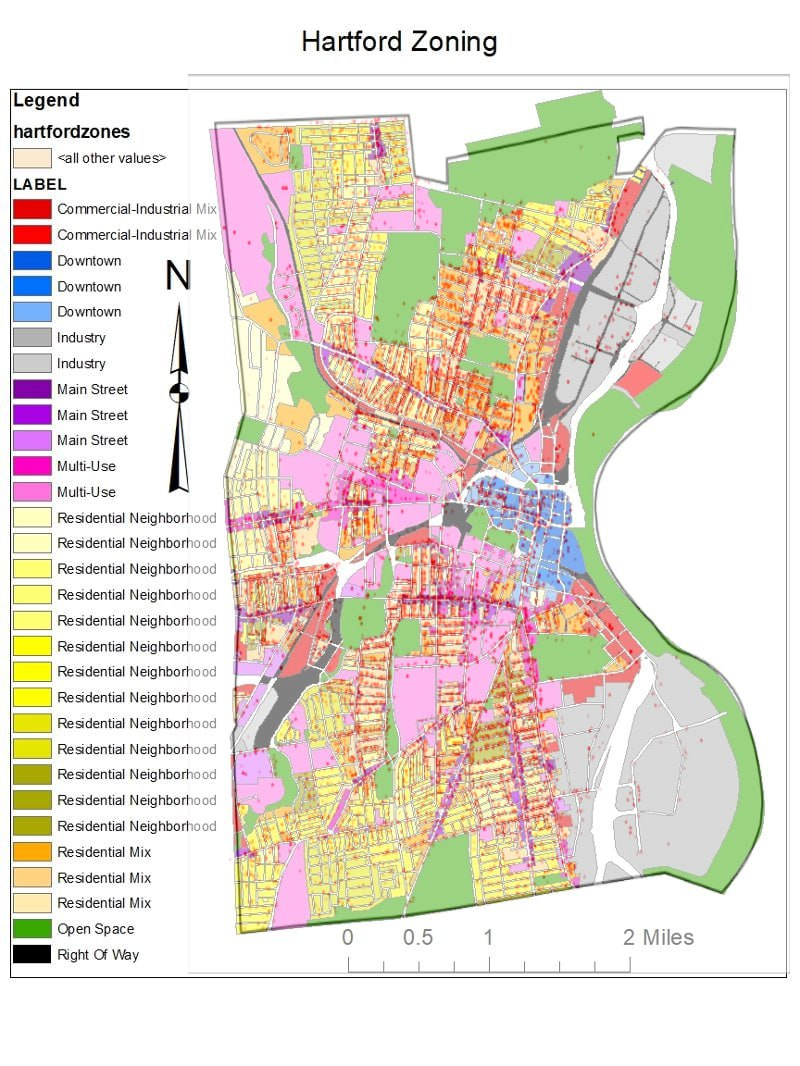